Importing required libraries

In [17]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Importing data from csv file into cardata

In [18]:

cardata=pd.read_csv("/content/CAR DETAILS FROM CAR DEKHO.csv")
cardata.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


information about dataframe

In [19]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


seperating dependent and independent variables

In [20]:
input_data=cardata.drop(["name"],axis=1)
target_data=cardata.selling_price


checking data

In [21]:
print(input_data.head())
print(target_data.head())

   year  selling_price  km_driven  ... seller_type transmission         owner
0  2007          60000      70000  ...  Individual       Manual   First Owner
1  2007         135000      50000  ...  Individual       Manual   First Owner
2  2012         600000     100000  ...  Individual       Manual   First Owner
3  2017         250000      46000  ...  Individual       Manual   First Owner
4  2014         450000     141000  ...  Individual       Manual  Second Owner

[5 rows x 7 columns]
0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64


Encoding the categorical columns


In [22]:
enc=LabelEncoder()
input_data['seller_type']=enc.fit_transform(input_data['seller_type'])
input_data["transmission"]=enc.fit_transform(input_data['transmission'])
input_data["owner"]=enc.fit_transform(input_data['owner'])
input_data["fuel"]=enc.fit_transform(input_data['fuel'])

In [23]:
cardata.fuel.value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [24]:
input_data.head(10)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,4,1,1,0
1,2007,135000,50000,4,1,1,0
2,2012,600000,100000,1,1,1,0
3,2017,250000,46000,4,1,1,0
4,2014,450000,141000,1,1,1,2
5,2007,140000,125000,4,1,1,0
6,2016,550000,25000,4,1,1,0
7,2014,240000,60000,4,1,1,2
8,2015,850000,25000,4,1,1,0
9,2017,365000,78000,0,1,1,0


In [25]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')


plotting relation of each independent variable with dependent variable 

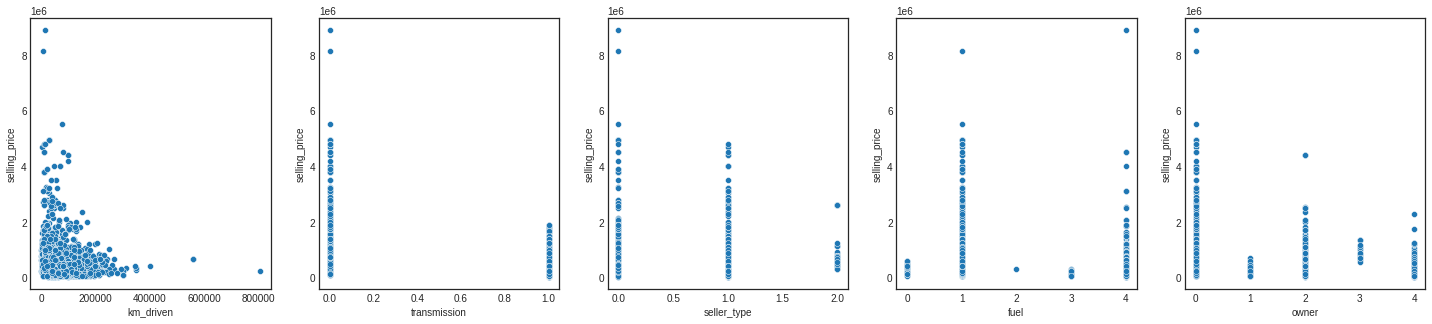

In [26]:
plt.figure(figsize=(25,5))
plt.subplot(1,5,1)
sns.scatterplot(x=input_data["km_driven"],y=input_data['selling_price'])

plt.subplot(1,5,2)
sns.scatterplot(x=input_data['transmission'],y=input_data['selling_price'])

plt.subplot(1,5,3)
sns.scatterplot(x=input_data['seller_type'],y=input_data['selling_price'])

plt.subplot(1,5,4)
sns.scatterplot(x=input_data['fuel'],y=input_data['selling_price'])

plt.subplot(1,5,5)
sns.scatterplot(x=input_data['owner'],y=input_data['selling_price'])

Splitting data into training and testing data

In [27]:
x_train,x_test,y_train,y_test=train_test_split(input_data,target_data,test_size=0.3,random_state=32)
print(x_train.shape)
print(x_test.shape)


(3038, 7)
(1302, 7)


Instantiating Linear Regression model

In [28]:
model=linear_model.LinearRegression()

In [29]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
y_pred=model.predict(x_test)

Evaluation metrics 

In [37]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2_score(y_test,y_pred)

1.0

In [32]:
mean_squared_error(y_test,y_pred)

1.660773336078694e-20

In [38]:
mean_absolute_error(y_test,y_pred)

5.902355170584128e-11

Testing the model with real independent values from dataset 

In [33]:
pred=model.predict([[2007,135000,50000,4,1,1,0]])
print(pred)

[135000.]


In [34]:
target_data[1]

135000

Both the predicted and actual values are same so our model is performing well